In [28]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
import matplotlib.pyplot as plt
sys.path.insert(0, '../')
from utils_color_extractor import ColorFeaturesExtractor

In [17]:
# extract feature from input img
img_path = '../test_imgs/retrieval.jpg'
img = cv2.imread(img_path)
cfe = ColorFeaturesExtractor((24,26,3), 0.6)
img_features = cfe.extract(img, True)

In [3]:
df_names = pd.read_csv('../train_filtered.csv')

In [4]:
df_features = pd.read_csv('../color_features/color_features.csv', sep='\t', header=None)

In [5]:
# align indexes
df_names.reset_index(inplace=True, drop=True)
df_features.reset_index(inplace=True, drop=True)

In [44]:
# create index
features_dim = len(df_features.loc[0])
t = AnnoyIndex(features_dim, metric='manhattan')
for index, row in df_features.iterrows():
    t.add_item(index, row.values)    
    
# num_trees = num_classes
num_trees = 9
_  = t.build(num_trees)

In [45]:
similar_img_index = t.get_nns_by_vector(img_features, 3)

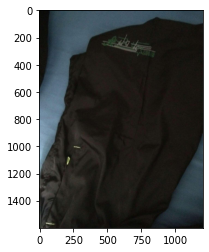

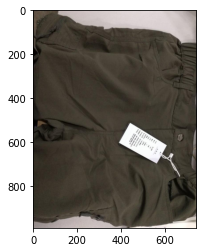

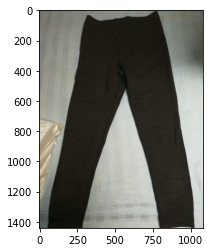

In [46]:
for index, row in df_names.iloc[similar_img_index].iterrows():
    tmp = cv2.imread('../data/train/' + row['name'])
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp)
    plt.show()